In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def initial_data():
    # 初期データをプロット
    initial_data = np.array([
        [ -17.68479511, -137.32915113,   46.32500283],
        [ -33.1789197,  -152.42541124,   43.86178683],
        [ -13.88828957, -133.48733746,   42.86239107],
        [ -31.1724372,  -148.96894162,   37.59119652],
        [ -19.49794841,  -143.5796686,   41.65777614],
        [ -34.99854766, -157.59790079,   36.28797697],
        [ -21.19631125, -135.04368494,   34.04813656],
        [ -29.48844711, -141.14590498,   32.14978359],
        [ -19.8226329,  -129.23647155,   24.03262747],
        [ -25.89702903, -133.17774691,   22.31863603],
        [ -18.02112367, -123.42931204,   17.89555559],
        [ -23.66030401, -126.31139358,   18.42510557]
    ])
    initial_data = np.reshape(initial_data, (12, 3))
    return initial_data

In [3]:
def pose_context():
        torso = [[0, 1] , [1, 7], [7, 6], [6, 0]]
        armr = [[1, 3], [3, 5]]
        arml = [[0, 2], [2, 4]]
        legr = [[6, 8], [8, 10]]
        legl = [[7, 9], [9, 11]]
        body = [torso, arml, armr, legr, legl]
        colors = ['red', 'blue', 'green', 'black', 'orange']
        return body, colors

body, colors = pose_context()

In [13]:

def get_R_x(theta):
    R = np.array([[1, 0, 0],
                  [0, np.cos(theta), -np.sin(theta)],
                  [0, np.sin(theta),  np.cos(theta)]])
    return R

R = get_R_x(np.pi/2)



# Get the initial data
data = initial_data()

data = data @ R   

#data[:, 0] = -data[:, 0]

#data = data_mat[:, [0, 2, 1]]
#data[:, 2] = -data[:, 2]

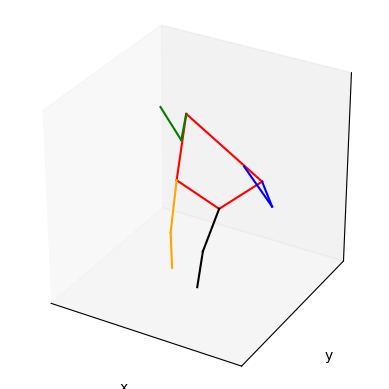

In [16]:

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])

for bodypart, part_color in zip(body, colors):
    for line in bodypart:
        ax.plot(xs = [data[line[0], 0], data[line[1], 0]], ys = [data[line[0], 1], data[line[1], 1]], zs = [data[line[0], 2], data[line[1], 2]], color=part_color)


# Plot the data
#ax.scatter(data[:, 0], data[:, 1], data[:, 2])
x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])
y_min, y_max = np.min(data[:, 1]), np.max(data[:, 1])
z_min, z_max = np.min(data[:, 2]), np.max(data[:, 2])

# Add some padding to the limits
padding = 10  # Adjust this value as needed
x_min, x_max = x_min - padding, x_max + padding
y_min, y_max = y_min - padding, y_max + padding
z_min, z_max = z_min - padding, z_max + padding

# Set plot labels and limits
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim3d(x_min, x_max)
ax.set_xlabel('x')
#ax.set_ylim3d(y_max, y_min)
ax.set_ylim3d(y_min, y_max)
ax.set_ylabel('y')
ax.set_zlim3d(z_min, z_max)
ax.set_zlabel('z')

# Show the plot
#ax.view_init(elev=90, azim=-90)
#ax.view_init(elev=30, azim=270) 
plt.show()
